# Data Preprocessing

In [56]:
import pandas as pd
import numpy as np
import datetime  
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/mergedData.csv')

Date of First Listing

In [5]:
#find the date of the first listing
first = data["creation_timestamp"].min()
datetime.date.fromtimestamp(first)

datetime.date(2022, 2, 7)

Date of Last Listing

In [6]:
#find the date of the last listing
last = data["creation_timestamp"].max()
datetime.date.fromtimestamp(last)

datetime.date(2022, 2, 25)

### Clean Up Columns

In [7]:
#get the columns
columns = data.columns
columns

Index(['Unnamed: 0', 'listing_id', 'shop_id', 'title_x', 'description',
       'num_favorers_x', 'listing_type', 'tags', 'materials', 'style',
       'taxonomy_id', 'price.amount', 'price.divisor', 'price.currency_code',
       'creation_timestamp', 'ending_timestamp', 'original_creation_timestamp',
       'quantity', 'shop_name', 'create_date', 'title_y', 'announcement',
       'currency_code', 'is_vacation', 'vacation_message', 'sale_message',
       'listing_active_count', 'accepts_custom_requests', 'url',
       'num_favorers_y', 'languages', 'is_shop_us_based',
       'transaction_sold_count', 'shipping_from_country_iso',
       'shop_location_country_iso', 'review_average', 'review_count'],
      dtype='object')

In [8]:
#rename columns to distinguish between attributes of the listings vs attributes of the shops
data = data.rename(columns={'title_x':'title_listing','num_favorers_x':'num_favorers_listing','title_y':'title_shop','num_favorers_y':'num_favorers_shop'})

In [72]:
#look at unique values in a single column and other characteristics
column = "price.amount"
values = list(set(data[column]))
values
#len(values)
#max(values)

[2050,
 4099,
 4100,
 2052,
 8200,
 16400,
 20500,
 8213,
 32795,
 32800,
 2090,
 2099,
 2100,
 6200,
 8250,
 14400,
 18500,
 26700,
 2125,
 4180,
 34900,
 85,
 39000,
 4088,
 6240,
 97,
 4195,
 2150,
 4199,
 4200,
 8300,
 59500,
 10350,
 115,
 16500,
 120,
 2175,
 80000,
 6273,
 2178,
 2180,
 32900,
 4230,
 249999,
 2195,
 4245,
 150,
 2199,
 2200,
 4250,
 6300,
 4253,
 57500,
 14495,
 10400,
 420000,
 14500,
 2225,
 180,
 34998,
 35000,
 4290,
 4295,
 200,
 2250,
 4299,
 4300,
 55500,
 6350,
 8400,
 12498,
 2259,
 12500,
 16600,
 67800,
 2270,
 24800,
 225,
 6370,
 2275,
 28900,
 33000,
 2280,
 2286,
 2290,
 2295,
 250,
 2299,
 2300,
 10495,
 6400,
 160000,
 10500,
 14600,
 18700,
 2320,
 22800,
 2325,
 280,
 4379,
 285,
 300,
 2350,
 8495,
 4400,
 4399,
 6450,
 8498,
 8500,
 14640,
 12599,
 12600,
 14650,
 320,
 6465,
 2370,
 24900,
 29000,
 37200,
 6480,
 2390,
 6490,
 2395,
 49500,
 350,
 6495,
 2400,
 2399,
 4450,
 6499,
 6500,
 2406,
 8550,
 10600,
 360,
 70000,
 375,
 27000,
 6

In [14]:
#Get URL for the shop for a specific listing
data[data['num_favorers_listing'] == 34939]['url']

#This is the url for the shop with the highest number of favorers

4519    https://www.etsy.com/shop/Tiletiletesto
Name: url, dtype: object

### Clean up the data

In [15]:
#drop irrelevant columns
data = data.drop(columns = ['Unnamed: 0','is_vacation', 'vacation_message', 'sale_message',])

In [16]:
#remove duplicate listings, keep the most recent
data = data[data.duplicated(subset='listing_id', keep='first')==False]

In [17]:
#update columns list
columns = data.columns

In [18]:
#identify columns that contain missing data
missing = []
for column in columns:
    null = data[data[column].isnull()]
    if len(null)!=0:
        missing.append(column)

In [19]:
#the first four columns having missing data shouldn't affect the analysis, 
#but I want to filter out the shops that have zero reviews (and therefore no review average)
missing

['title_shop',
 'announcement',
 'shipping_from_country_iso',
 'shop_location_country_iso',
 'review_average',
 'review_count']

In [20]:
#remove listings from shops with no reviews
data = data[data['review_average'].notnull()]

### Facts
11,991 individual listings,
2843 shops,
max favorers = 34939

## Visualize and Explore

### Explore attributes of the shops

NOTE: Add title to subplots below?

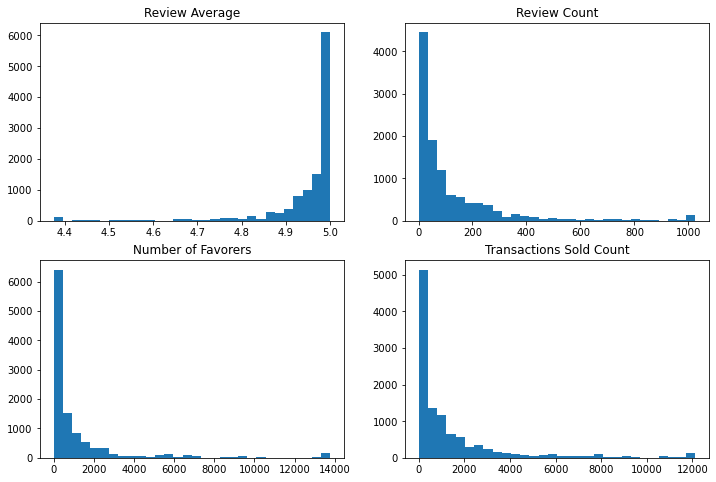

In [71]:
#Plot info about shops
#The plots were highly skewed so I adjusted the axes to display 99% of the data which helped them be more meaningful visually
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.hist(np.clip(data['review_average'],data['review_average'].quantile(.01),5.0), bins = 30)
ax2.hist(np.clip(data['review_count'],0,data['review_count'].quantile(.99)), bins = 30)
ax3.hist(np.clip(data['num_favorers_shop'],0,data['num_favorers_shop'].quantile(.99)), bins = 30)
ax4.hist(np.clip(data['transaction_sold_count'],0,data['transaction_sold_count'].quantile(.99)), bins = 30)
ax1.title.set_text('Review Average')
ax2.title.set_text('Review Count')
ax3.title.set_text('Number of Favorers')
ax4.title.set_text('Transactions Sold Count')
plt.show()

In [29]:
#percentage of shops with review average above a value
averages = [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]

for avg in averages:
    percent = len([i for i in data['review_average'] if i > avg])/len(data)
    print(avg,percent)

4.0 0.9930636879560399
4.1 0.9929736059814431
4.2 0.9918025403116836
4.3 0.9914422124132961
4.4 0.9899108188451491
4.5 0.9850463922169174
4.6 0.9813530312584452
4.7 0.9698225385100442
4.8 0.9473020448608234
4.9 0.8738852355643636


98.5% of shops have review averages above 4.5

### Explore attributes of the listings

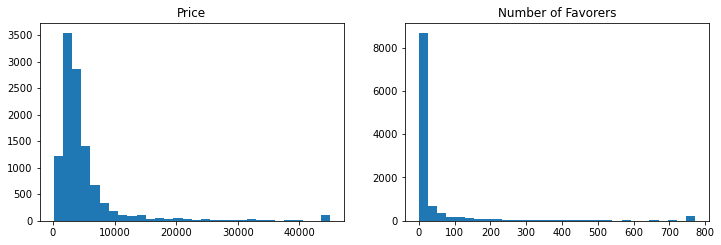

In [75]:
#Plot info about listings
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.hist(np.clip(data['price.amount'],0,data['price.amount'].quantile(.99)), bins = 30)
ax2.hist(np.clip(data['num_favorers_listing'],0,data['num_favorers_listing'].quantile(.98)), bins = 30)
ax1.title.set_text('Price')
ax2.title.set_text('Number of Favorers')
plt.show()

## Filter by US data
In case I want to compare US vs. International Listings Later

In [64]:
#create dataframe with listings from shops based in the US
us_data = data[data["is_shop_us_based"]]

In [65]:
us_data

,listing_id,shop_id,title_listing,description,num_favorers_listing,listing_type,tags,materials,style,taxonomy_id,...,accepts_custom_requests,url,num_favorers_shop,languages,is_shop_us_based,transaction_sold_count,shipping_from_country_iso,shop_location_country_iso,review_average,review_count
8,889589581,25463077,Personalizable Japanese Style Vintage Ceramic ...,Humbly designed and manually made simple ceram...,7032,physical,"['ceramic mug', 'ceramic cup', 'vintage cup', ...","['Ceramic', 'Wood']",[],1062,...,True,https://www.etsy.com/shop/HomeRelaxStudio,559,['en-US'],True,4479,US,US,4.7222,486.0
9,490266862,9628546,1997 Handmade Pottery Blessing Bowl Signed and...,(What is a Blessing Bowl) Attached photos foun...,10,physical,"['gvs team', 'kisv team', 'planter', 'home dec...",[],"['Victorian', 'Regency']",1002,...,False,https://www.etsy.com/shop/CRAZYMARYSFINDS,886,['en-US'],True,3267,US,US,4.9882,169.0
10,815605319,9018947,Free Shipping | Tiny ceramic dish set of 4 | H...,Tiny ceramic dish set of 4. They are approxima...,6,physical,"['handmade', 'stoneware', 'ceramic', 'brown', ...",['Ceramic'],"['Cottage Chic', 'Woodland']",1044,...,False,https://www.etsy.com/shop/NanasHousePottery,476,['en-US'],True,229,US,US,5.0000,6.0
11,774140517,9018947,Pitcher | FREE SHIPPING | Ceramic pitcher | St...,"Ceramic creamer. It is 3.75” high, 3.25” wide...",4,physical,"['handmade', 'stoneware', 'vase', 'Container',...","['glaze', 'clay', 'stoneware', 'ceramic']","['Cottage Chic', 'Woodland']",1026,...,False,https://www.etsy.com/shop/NanasHousePottery,476,['en-US'],True,229,US,US,5.0000,6.0
12,954752180,9018947,Free Shipping | Small Serving bowl | Fruit Bow...,Beautiful set of 4 small bowls in earth tones ...,3,physical,"['soup bowl', 'pasta bowl', 'rice bowl', 'smal...",['Ceramic'],"['Cottage Chic', 'Woodland']",1044,...,False,https://www.etsy.com/shop/NanasHousePottery,476,['en-US'],True,229,US,US,5.0000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,950887346,12797164,Handmade Ceramic Serving Bowl in Blues with Br...,Wheel thrown white stoneware serving bowl. Ha...,1,physical,"['handmade', 'ceramic', 'stoneware', 'pottery'...",['Ceramic'],[],1044,...,True,https://www.etsy.com/shop/UniqpotterybyEx,131,['en-US'],True,271,US,US,4.9706,34.0
11990,881245736,12797164,Handmade Stoneware Pedestal Jewelry Keeper in ...,Handmade ceramic pedestal jewelry holders. Wh...,5,physical,"['handmade', 'ceramic', 'stoneware', 'pottery'...","['handmade', 'ceramic', 'stoneware', 'pottery'...",[],6674,...,True,https://www.etsy.com/shop/UniqpotterybyEx,131,['en-US'],True,271,US,US,4.9706,34.0
11991,274498962,5462443,Mottled Purple Buttons Three Handmade Stonewar...,"Handmade stoneware, high fired buttons to use ...",1,physical,"['clay', 'felting', 'sewing', 'fiber art accen...","['stoneware clay', 'glazes']",[],6270,...,True,https://www.etsy.com/shop/LaurelArts,4558,['en-US'],True,30672,US,US,4.9210,1532.0
11992,1097306213,19789401,Vintage Pottery Stoneware X-Large Blue Pitcher...,"This listing is for one (1 ) vintage, handmade...",0,physical,"['thevintagevixenshop', 'free shipping', 'ston...",['handmade'],[],1938,...,False,https://www.etsy.com/shop/TheVintageVixenShop,98,['en-US'],True,637,US,NaN,4.8800,100.0
